# Pymaceuticals

# Results and Conclusions 

1. The study analyzed ten different drugs and their effects on tumor volume in a sample of 250 mice.  We then looked at four drugs in particular (Capomulin, Infubinol, Ketapril, and Placebo) over a 45 day span.  The Ketapril, Infubinol, and Placebo all experienced average increases of tumor volume over 45% while the Capomulin showed a reduction of 19%.

2. Ketapril resulted in the largest number of meatstatic sites at the conclusion of our trial, overtaking the Placebo during the very last days.  Capomulin resulted in the lowest number of metastatic sites throughout the 45 days.

3. Capomulin also proved to be the best treatment when considering survivability with 21 mice living through our trial.  Only 9 mice on the Infubinol treatment survived the duration of the trial.

After the 45 day trial, Capomulin is clearly the best treatment option.  Capomulin was the only drug with a reduction in tumor volume, had the highest survivability rate and the best outcomes on metastatic spread.  No other drug appears to be a viable alternative based on our data.

It is important to mention some limitations of the research such as the credibility of the results based on the small sample size (25 mice per drug).  Without leveraging hypothesis testing we cannot make any significant conclusions.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [2]:
# Create file paths for raw data
tumor_dataCSV = os.path.join('raw_data', 'clinicaltrial_data.csv')
# Read the CSV file into a Pandas DataFrame
tumor_data = pd.read_csv(tumor_dataCSV)
tumor_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Create file paths for raw data
drug_dataCSV = os.path.join('raw_data', 'mouse_drug_data.csv')
# Read the CSV file into a Pandas DataFrame
drug_data = pd.read_csv(drug_dataCSV)
drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
#Merge the two dataframes and call the resulting df
trial_df = pd.merge(tumor_data, drug_data, how='outer', on='Mouse ID')
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


# Tumor Response to Treatment

In [5]:
# Mean Tumor Volume by Drug name and Timepoint
Tumor_group_df = trial_df.groupby(['Drug','Timepoint'])
Tumor_mean_df = pd.DataFrame(Tumor_group_df ["Tumor Volume (mm3)"].mean())
Tumor_mean_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [6]:
# Standard Error by Drug name and Timepoint
Tumor_sem_df = pd.DataFrame(Tumor_group_df ["Tumor Volume (mm3)"].sem())
Tumor_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
# Create dataframe that will be used for plot
tumor_plot_df = Tumor_mean_df.unstack(0)
tumor_plot_df_2 = tumor_plot_df["Tumor Volume (mm3)"]
tumor_plot_df_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [10]:
html_table_tumor_response = tumor_plot_df_2.to_html()
tumor_plot_df_2.to_html('table_tumor_response.html')

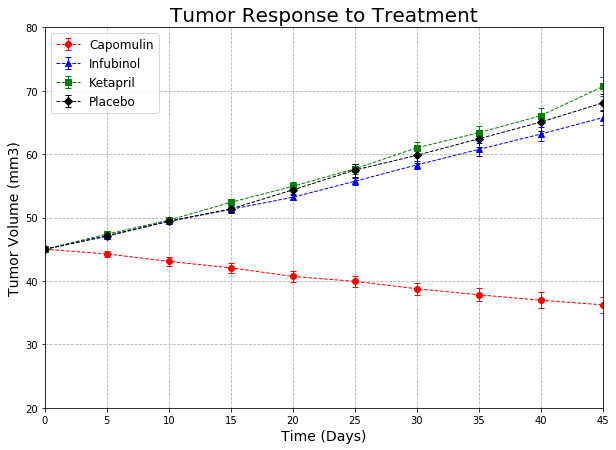

In [11]:
#Creating the Plot

#define x-axis
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

#Define each drug
error = Tumor_sem_df["Tumor Volume (mm3)"]["Capomulin"]
Capomulin = plt.errorbar(x_axis, tumor_plot_df_2["Capomulin"], yerr=error, fmt="o", color="red", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = Tumor_sem_df["Tumor Volume (mm3)"]["Infubinol"]
Infubinol = plt.errorbar(x_axis, tumor_plot_df_2["Infubinol"], yerr=error, fmt="^", color="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = Tumor_sem_df["Tumor Volume (mm3)"]["Ketapril"]
Ketapril = plt.errorbar(x_axis, tumor_plot_df_2["Ketapril"], yerr=error, fmt="s", color="green", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = Tumor_sem_df["Tumor Volume (mm3)"]["Placebo"]
Placebo = plt.errorbar(x_axis, tumor_plot_df_2["Placebo"], yerr=error, fmt="D", color="black", ls="dashed", linewidth=1, alpha=1, capsize=3)

#Axes limits
plt.ylim(20, 80)
plt.xlim(0, 45)

#Axes and Chart Labels
plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.grid(linestyle="dashed")

#Chart Legend 
plt.legend((Capomulin, Infubinol, Ketapril, Placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

# Metastatic Response to Treatment

In [11]:
# Metastatic sites by Drug
Metastasis_mean_df = pd.DataFrame(Tumor_group_df ["Metastatic Sites"].mean())
Metastasis_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Metastatic sites by Drug Standard Error
Metastasis_sem_df = pd.DataFrame(Tumor_group_df ["Metastatic Sites"].sem())
Metastasis_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Create dataframe that will be used for plot
meta_plot_df = Metastasis_mean_df.unstack(0)
meta_plot_df_2 = meta_plot_df["Metastatic Sites"]
meta_plot_df_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [15]:
html_table_metastic_spread = meta_plot_df_2.to_html()
meta_plot_df_2.to_html('Metastatic_Spread.html')

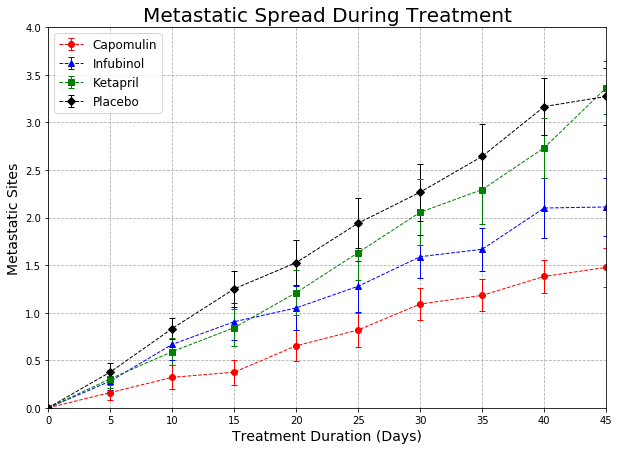

In [15]:
#Creating the Plot

plt.figure(figsize=(10,7))

#Define each drug
error2 = Metastasis_sem_df["Metastatic Sites"]["Capomulin"]
Capomulin2 = plt.errorbar(x_axis, meta_plot_df_2["Capomulin"], yerr=error2, fmt="o", color="red", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = Metastasis_sem_df["Metastatic Sites"]["Infubinol"]
Infubinol2 = plt.errorbar(x_axis, meta_plot_df_2["Infubinol"], yerr=error2, fmt="^", color="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = Metastasis_sem_df["Metastatic Sites"]["Ketapril"]
Ketapril2 = plt.errorbar(x_axis, meta_plot_df_2["Ketapril"], yerr=error2, fmt="s", color="green", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = Metastasis_sem_df["Metastatic Sites"]["Placebo"]
Placebo2 = plt.errorbar(x_axis, meta_plot_df_2["Placebo"], yerr=error2, fmt="D", color="black", ls="dashed", linewidth=1, alpha=1, capsize=3)

#Axes limits
plt.ylim(0, 4)
plt.xlim(0, 45)

#Axes and Chart Labels
plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.ylabel("Metastatic Sites", fontsize=14)
plt.grid(linestyle="dashed")

#Chart Legend
plt.legend((Capomulin2, Infubinol2, Ketapril2, Placebo2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

# Survival Rates

In [17]:
mice_count_df = pd.DataFrame(Tumor_group_df["Mouse ID"].count())
mice_count_df = mice_count_df.rename(columns={"Mouse ID": "Mouse Count"})
mice_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [18]:
mice_plot = mice_count_df.unstack(0)
mice_plot_2 = mice_plot["Mouse Count"]
mice_plot_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [19]:
html_table_survival_rates = mice_plot_2.to_html()
mice_plot_2.to_html('Survival_Rates.html')

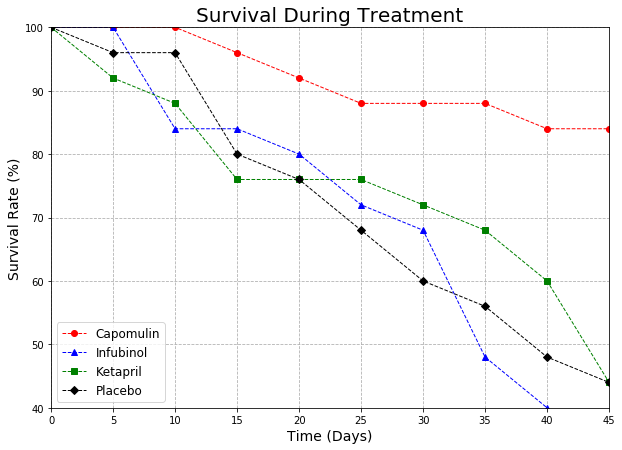

In [18]:
#Creating the Plot
plt.figure(figsize=(10,7))

#Mice Count per Drug
Capomulin3 = plt.errorbar(x_axis, (mice_plot_2["Capomulin"]/25*100), fmt="o", color="red", ls="dashed", linewidth=1, alpha=1, capsize=3)
Infubinol3 = plt.errorbar(x_axis, (mice_plot_2["Infubinol"]/25*100), fmt="^", color="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)
Ketapril3 = plt.errorbar(x_axis, (mice_plot_2["Ketapril"]/25*100),  fmt="s", color="green", ls="dashed", linewidth=1, alpha=1, capsize=3)
Placebo3 = plt.errorbar(x_axis, (mice_plot_2["Placebo"]/25*100),  fmt="D", color="black", ls="dashed", linewidth=1, alpha=1, capsize=3)

#Axes Limits
plt.ylim(40, 100)
plt.xlim(0, 45)

#Axes and Chart Labels
plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)
plt.grid(linestyle="dashed")

#Chart Legend
plt.legend((Capomulin3, Infubinol3, Ketapril3, Placebo3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

# Summary Bar Graph

In [20]:
#Creating the summary table
summary_df = pd.DataFrame((tumor_plot_df_2.iloc[9,:]-tumor_plot_df_2.iloc[0,:])*100/tumor_plot_df_2.iloc[0,:])

# Renaming the column
summary_df_2 = summary_df.rename(columns={0:"Percent Tumor Change"})

summary_df_2

,Percent Tumor Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [21]:
html_table_tumor_changes = summary_df_2.to_html()
summary_df_2.to_html('Tumor_Changes.html')

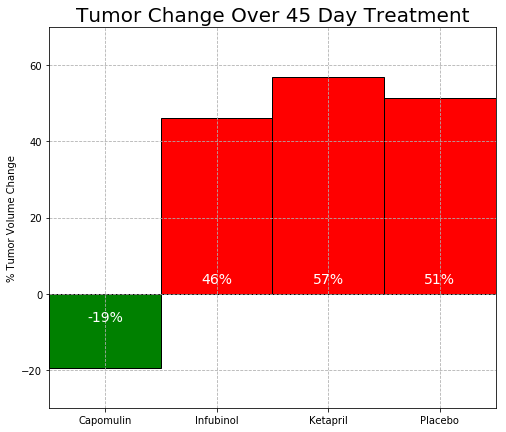

In [35]:
#Creating the final summary bar plot

plt.figure(figsize=(8,7))

#Graphing each drug
change_cap = plt.bar(0, summary_df_2["Percent Tumor Change"][0], color='green', alpha=1, align="edge", ec="black", width=1)
change_inf = plt.bar(1, summary_df_2["Percent Tumor Change"][2], color='red', alpha=1, align="edge", ec="black", width=1)
change_ket = plt.bar(2, summary_df_2["Percent Tumor Change"][3], color='red', alpha=1, align="edge", ec="black", width=1)
change_plac = plt.bar(3, summary_df_2["Percent Tumor Change"][5], color='red', alpha=1, align="edge", ec="black", width=1)

#Bar Height for Capomulin
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(change_cap)

#Bar Height for Infubinol, Ketapril, and Placebo
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(change_inf)
autolabel(change_ket)
autolabel(change_plac)

#Formatting
xvalues=["Capomulin", "Infubinol", "Ketapril", "Placebo"]
x_axis2 = np.arange(0,len(xvalues),1)
tick_locations = [value+0.5 for value in x_axis2]
plt.xticks(tick_locations, (xvalues))
plt.grid(linestyle="dashed")

#Axes Limits
plt.xlim(0, 4)
plt.ylim(-30, 70)

#Axes and Chart Labels
plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change")


plt.show()